In [1]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [2]:
pip install chromedriver_py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 13.5 MB/s eta 0:00:00


In [3]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
sudo apt-get install -f

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,498 kB]
Get:14 http://arch

In [4]:
import pandas as pd
import selenium
import pprint
import time

In [5]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from tqdm.notebook import tqdm
import pandas
import json
import pprint
from chromedriver_py import binary_path

In [6]:
chrome_options = webdriver.ChromeOptions()  # Initialize Chrome options
chrome_options.add_argument('--headless')  # Run Chrome in headless mode - In our local notebook we can remove the `--headless` option.
chrome_options.add_argument('--no-sandbox')  # Disable Chrome’s default sandboxing behavior
chrome_options.add_argument('--disable-dev-shm-usage')  # Overcome limited resource problems
chrome_options.add_argument("window-size=1900,800")  # Set the window size for the browser
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")  # Set a custom user agent

In [7]:
service = Service(executable_path=binary_path)  # Create a Service object with the path to the ChromeDriver executable
wd = webdriver.Chrome(service=service, options=chrome_options)  # Initialize the WebDriver with the specified service and options

In [8]:
def show_page():
  # test per vedere dove sono al momento
  wd.save_screenshot('screenshot.png')

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg

  img = mpimg.imread('/content/screenshot.png')
  plt.figure(figsize=(20, 10))
  imgplot = plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [9]:
def back_to_top_page():
  wd.execute_script("window.scrollTo(0, 0);")
  show_page()

In [10]:
def read_post(post):
  body = post.find_element(By.CSS_SELECTOR, 'div.css-146c3p1.r-8akbws.r-krxsd3.r-dnmrzs.r-1udh08x.r-bcqeeo.r-1ttztb7.r-qvutc0.r-37j5jr.r-a023e6.r-rjixqe.r-16dba41.r-bnwqim').text
  count_comments = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[0].text
  count_retweets = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[1].text
  count_likes = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[2].text
  count_views = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[3].text
  print(body)
  print('--------------')

In [94]:
#tweet siccità da 2023-01-01 a 2024-08-26
x_page = 'https://x.com/search?q=siccit%C3%A0%20until%3A2023-02-15%20since%3A2023-01-01&src=typed_query&f=live'

In [95]:
#open login page
wd.get(x_page)

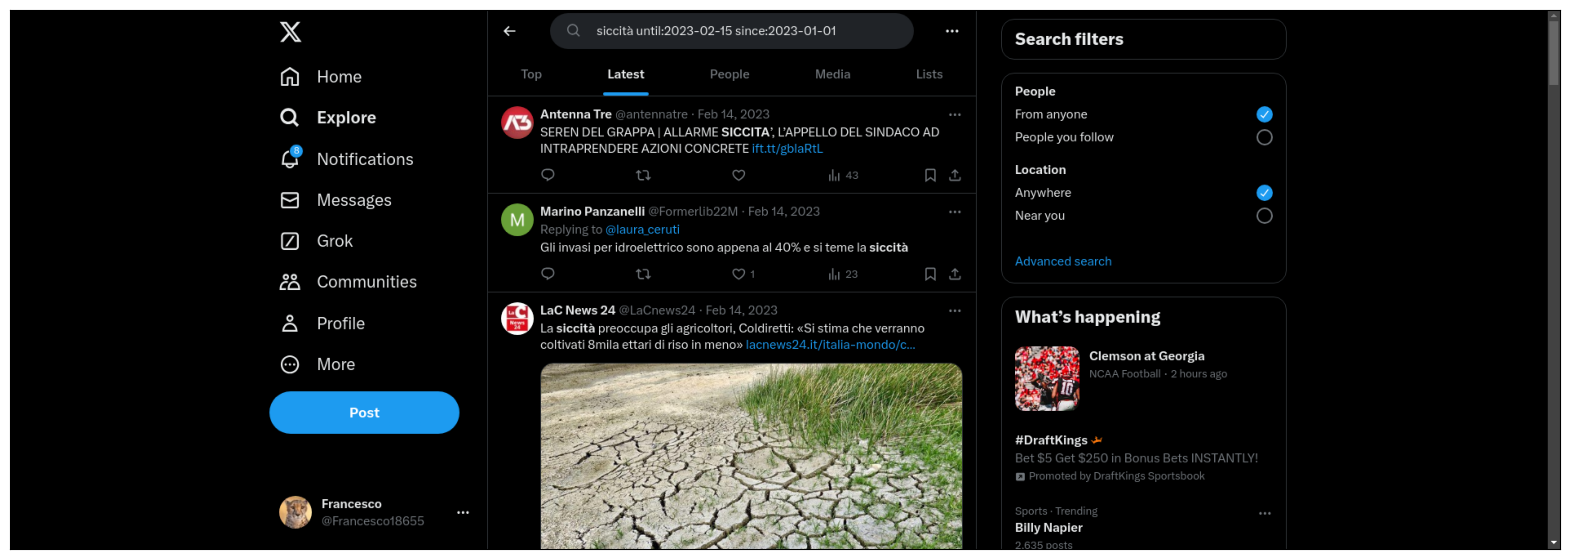

In [97]:
show_page()

In [14]:
#input email
from selenium.webdriver.common.keys import Keys

inputbox = wd.find_elements(By.CSS_SELECTOR, "input.r-30o5oe.r-1dz5y72.r-13qz1uu.r-1niwhzg.r-17gur6a.r-1yadl64.r-deolkf.r-homxoj.r-poiln3.r-7cikom.r-1ny4l3l.r-t60dpp.r-fdjqy7")[0]
inputbox.clear()
inputbox.send_keys('f.bogazzi@campus.unimib.it')
inputbox.send_keys(Keys.RETURN)

In [15]:
#check if X detected an unusual activity
if wd.find_elements(By.CSS_SELECTOR, "h1.css-146c3p1.r-bcqeeo.r-1ttztb7.r-qvutc0.r-37j5jr.r-1yjpyg1.r-ueyrd6.r-b88u0q")[0].text == 'Enter your phone number or username':
  userbox = wd.find_elements(By.CSS_SELECTOR, "input.r-30o5oe.r-1dz5y72.r-13qz1uu.r-1niwhzg.r-17gur6a.r-1yadl64.r-deolkf.r-homxoj.r-poiln3.r-7cikom.r-1ny4l3l.r-t60dpp.r-fdjqy7")[0]
  userbox.send_keys('Francesco')
  userbox.send_keys(Keys.RETURN)

IndexError: list index out of range

In [16]:
#input password
passbox = wd.find_elements(By.CSS_SELECTOR, "input.r-30o5oe.r-1dz5y72.r-13qz1uu.r-1niwhzg.r-17gur6a.r-1yadl64.r-deolkf.r-homxoj.r-poiln3.r-7cikom.r-1ny4l3l.r-t60dpp.r-fdjqy7")[0]
passbox.send_keys('ProgettoMaster24')
passbox.send_keys(Keys.RETURN)

In [ ]:
#input codice di sicurezza
codesecure = wd.find_elements(By.CSS_SELECTOR, "input.r-30o5oe.r-1dz5y72.r-13qz1uu.r-1niwhzg.r-17gur6a.r-1yadl64.r-deolkf.r-homxoj.r-poiln3.r-7cikom.r-1ny4l3l.r-t60dpp.r-fdjqy7")[0]
codesecure.clear()
codesecure.send_keys('sgi5fg7a')
codesecure.send_keys(Keys.RETURN)

IndexError: list index out of range

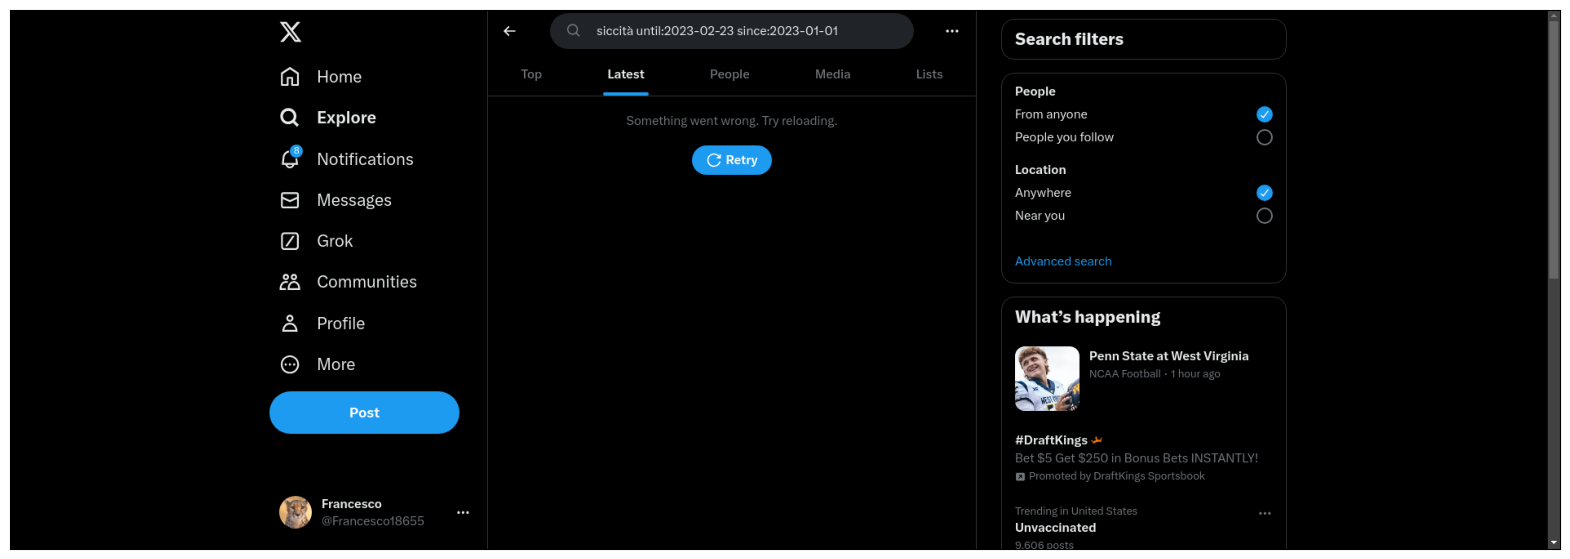

In [61]:
show_page()

6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342


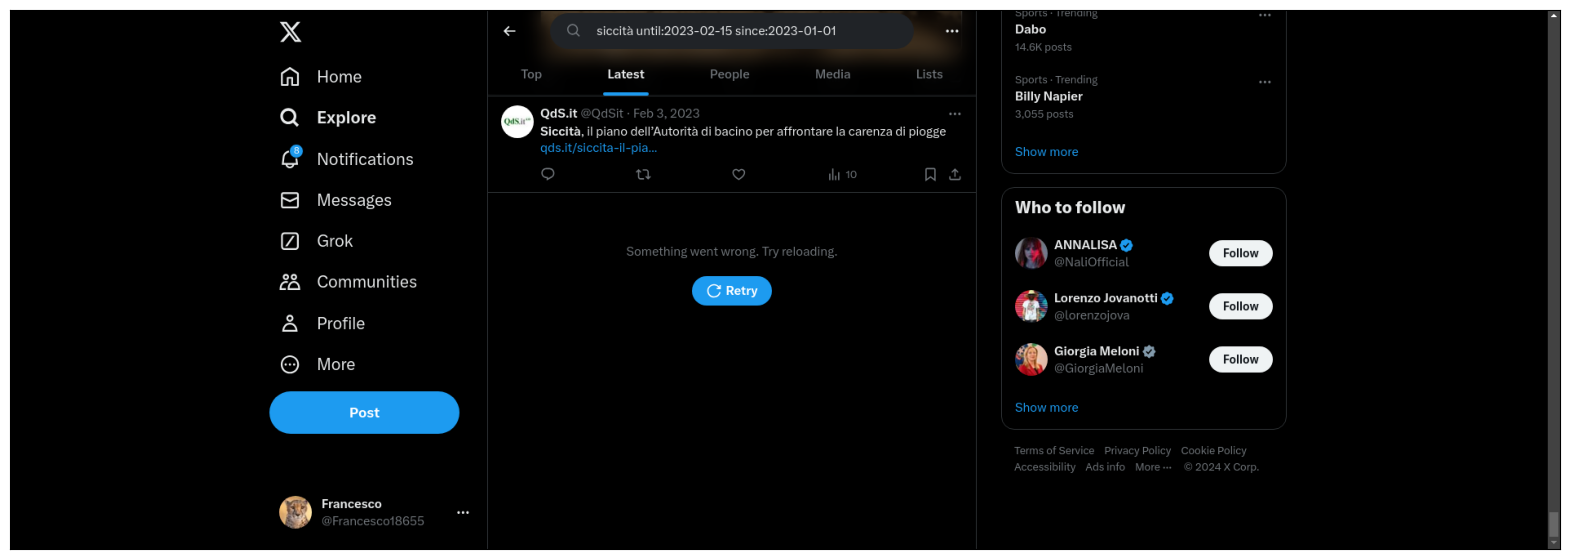

In [98]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

import random

#imposta se continuare da dove si è fermato. se true ricomincia
start_scrape = False
if start_scrape == True:
  columns = ['body', 'date', 'count_comments', 'count_retweets', 'count_likes', 'count_views']
  #Crea un DataFrame vuoto con le colonne definite
  df_tweets = pd.DataFrame(columns=columns)
  wd.execute_script("window.scrollTo(0, 0);")

#wd.execute_script("window.scrollTo(0, 0);")

posts = wd.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-1igl3o0.r-qklmqi.r-1adg3ll.r-1ny4l3l')
post_saved = set()
insert_has_done = True
num_attempt = 0
id = 0

while insert_has_done == True or num_attempt == 1:
  insert_has_done = False
  for post in posts:
    if post.id not in post_saved:
      try:
        body = post.find_element(By.CSS_SELECTOR, 'div.css-146c3p1.r-8akbws.r-krxsd3.r-dnmrzs.r-1udh08x.r-bcqeeo.r-1ttztb7.r-qvutc0.r-37j5jr.r-a023e6.r-rjixqe.r-16dba41.r-bnwqim').text
        date = post.find_element(By.CSS_SELECTOR, 'div.css-175oi2r.r-18u37iz.r-1q142lx').text
        count_comments = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[0].text
        count_retweets = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[1].text
        count_likes = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[2].text
        try:
          count_views = post.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-xoduu5.r-1udh08x')[3].text
        except IndexError:
          count_views = None
        row = [body, date, count_comments, count_retweets, count_likes, count_views]
        df_tweets.loc[len(df_tweets)] = row
        print(len(df_tweets))
        insert_has_done = True
        num_attempt = 0
        post_saved.add(post.id)
      except NoSuchElementException:
        pass
        #print('Pubblicità')
        #print('--------------')
      except StaleElementReferenceException:
        pass
        print('Stale')
  if insert_has_done == False:
    num_attempt = num_attempt + 1

  wd.execute_script("window.scrollBy(0, 1000);")
  posts = wd.find_elements(By.CSS_SELECTOR, 'div.css-175oi2r.r-1igl3o0.r-qklmqi.r-1adg3ll.r-1ny4l3l')
  random_number = random.uniform(1,2)
  time.sleep(random_number)

show_page()

In [99]:
df_tweets


,body,date,count_comments,count_retweets,count_likes,count_views
0,Hanno sufficienti colpe per non dovergliene at...,"Mar 14, 2023",,,,4
1,"TREVISO | SICCITA’, PRONTA L’ORDINANZA REGIONA...","Mar 14, 2023",,,,4
2,"Siccità in Veneto, Zaia ha firmato l'ordinanza...","Mar 14, 2023",,,,4
3,#PrimoPiano Sud globale e siccità nell’incontr...,"Mar 14, 2023",,1,,9
4,"Siccità, Zaia ha firmato l’ordinanza anti-spre...","Mar 14, 2023",,,,8
...,...,...,...,...,...,...
7013,Sicilia: Piano Autorità di bacino contro sicci...,"Feb 3, 2023",,,1,116
7014,"Siccità, il piano dell’Autorità di bacino per ...","Feb 3, 2023",,,,7
7015,"#Siccità, assessore \n@RegLombardia\n Enti Loc...","Feb 3, 2023",,,,57
7016,"Siccità, assessore enti locali: ""Necessario da...","Feb 3, 2023",,,,4


In [100]:
df_tweets.to_excel('10tweets_siccita_2023(14apr_3feb).xlsx', index=False)